In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

from collections import defaultdict

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import SequentialFeatureSelector

from mlxtend.feature_selection import SequentialFeatureSelector as SFS


from statsmodels.stats.outliers_influence import variance_inflation_factor 


from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from sklearn.metrics import make_scorer

#from custom_scorer_module import custom_scoring_function

from sklearn.model_selection import ShuffleSplit,cross_val_score
from stepwise_regression import step_reg
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

import warnings
warnings.filterwarnings("ignore")



In [100]:
df_train = pd.read_csv('7406train.csv', header=None)
df_train.shape

(10000, 202)

In [101]:
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,0.0,0.00,14.063579,21.082123,12.992643,10.154928,12.817867,52.655972,16.337817,23.191534,...,46.663096,16.637476,31.356967,15.194169,11.371479,12.681528,28.779674,26.693366,29.687207,25.947949
1,0.0,0.01,31.739201,11.173196,12.339920,61.565603,24.540478,19.567963,10.361631,21.469419,...,20.314870,17.912426,20.943154,20.241337,14.002437,19.213766,42.269653,18.762048,17.165399,9.066624
2,0.0,0.02,14.615998,19.892816,13.872612,20.196217,24.010112,17.027382,16.154610,16.103595,...,17.841418,26.119396,18.884598,15.925749,14.798067,15.217862,10.611148,11.695364,8.771664,17.765064
3,0.0,0.03,10.857759,10.859013,17.228320,41.176834,12.082179,13.499356,23.982232,13.807374,...,12.908245,53.329340,17.939097,59.636709,7.645945,9.644091,22.337745,31.999950,16.571976,20.740766
4,0.0,0.04,21.467285,18.571400,10.624715,30.268410,16.656842,18.797707,10.653434,22.814054,...,10.825614,20.363934,21.363700,18.395306,17.778682,11.232521,18.560414,25.251054,28.931830,14.606190


In [102]:
col_dict=defaultdict()
for item in df_train.columns:
    col_dict[item]='col_'+ str(item)
#dict(col_dict)

In [103]:
df_train.rename(columns=col_dict, inplace=True)
df_train.rename(columns={'col_0':'x1','col_1':'x2'}, inplace=True)
df_train['mean_cols']=np.mean(df_train.iloc[:,2:202], axis=1)
df_train['var_cols']=np.var(df_train.iloc[:,2:202], axis=1)
final_df_mean=df_train[['x1','x2','mean_cols']]
final_df_mean

,x1,x2,mean_cols
0,0.00,0.00,21.368195
1,0.00,0.01,19.006440
2,0.00,0.02,20.258861
3,0.00,0.03,21.553905
4,0.00,0.04,20.659588
...,...,...,...
9995,0.99,0.95,60.938533
9996,0.99,0.96,61.575708
9997,0.99,0.97,61.362636
9998,0.99,0.98,62.292096


In [94]:
df_train.iloc[:,2:500]

,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,...,col_194,col_195,col_196,col_197,col_198,col_199,col_200,col_201,mean_cols,var_cols
0,14.063579,21.082123,12.992643,10.154928,12.817867,52.655972,16.337817,23.191534,14.605927,17.985580,...,31.356967,15.194169,11.371479,12.681528,28.779674,26.693366,29.687207,25.947949,21.899786,184.911024
1,31.739201,11.173196,12.339920,61.565603,24.540478,19.567963,10.361631,21.469419,17.115235,12.716574,...,20.943154,20.241337,14.002437,19.213766,42.269653,18.762048,17.165399,9.066624,19.311583,98.961211
2,14.615998,19.892816,13.872612,20.196217,24.010112,17.027382,16.154610,16.103595,11.102727,51.888369,...,18.884598,15.925749,14.798067,15.217862,10.611148,11.695364,8.771664,17.765064,20.543837,93.761829
3,10.857759,10.859013,17.228320,41.176834,12.082179,13.499356,23.982232,13.807374,15.384852,22.652608,...,17.939097,59.636709,7.645945,9.644091,22.337745,31.999950,16.571976,20.740766,22.096251,189.579440
4,21.467285,18.571400,10.624715,30.268410,16.656842,18.797707,10.653434,22.814054,20.977730,12.843942,...,21.363700,18.395306,17.778682,11.232521,18.560414,25.251054,28.931830,14.606190,21.014388,117.173796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67.696477,62.669471,59.093471,54.683607,72.114475,81.465554,50.309119,65.182860,68.160797,80.733621,...,71.315168,71.960717,70.883221,45.778002,59.456879,58.116272,66.957658,76.262732,61.200322,127.031285
9996,57.374739,66.897261,62.655812,62.004188,70.234985,69.308978,75.092123,62.608017,58.890576,54.405956,...,59.761602,57.660125,44.828161,62.884349,50.863227,70.406568,57.976059,49.179771,61.759679,105.051623
9997,49.900371,69.655773,57.646385,55.405063,72.423901,58.930084,38.426946,65.737290,57.772182,42.464397,...,60.905358,59.589382,51.300082,65.411723,64.928145,64.466348,63.508603,62.505428,61.467204,84.274727
9998,51.529862,54.995091,52.393421,58.872693,60.446550,74.440817,66.179499,60.213038,66.956283,59.475878,...,56.801916,71.016431,54.646326,63.126287,62.826411,66.008724,61.964206,60.881122,62.236461,51.423351


In [73]:
from sklearn.preprocessing import PolynomialFeatures


X=final_df_mean[['x1','x2']]
y=final_df_mean['mean_cols']

train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later


    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

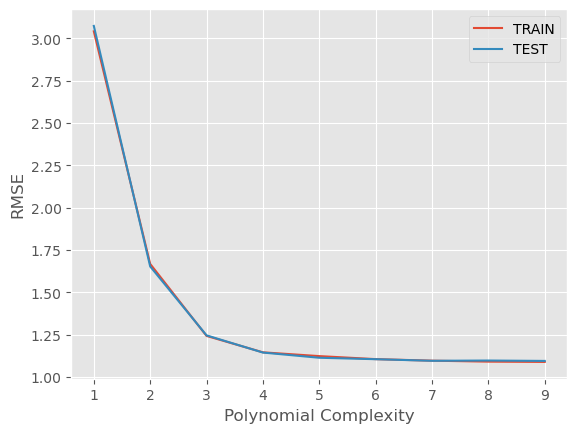

In [74]:
plt.plot(range(1,10),train_rmse_errors[:11],label='TRAIN')
plt.plot(range(1,10),test_rmse_errors[:11],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [81]:
polynomial_converter = PolynomialFeatures(degree=4,include_bias=False)

model = LinearRegression(fit_intercept=True)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_pc=cross_val_score(model,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_pc))
print("Average Cross Validation score :{}".format(scores_pc.mean()))
print("Variance of Cross Validation score :{}".format(scores_pc.var()))

cross Validation scores:n [0.95160318 0.94982481 0.95158989 0.94876944 0.94998146 0.94947945
 0.95153754 0.95076021 0.94947163 0.95162626 0.94977665 0.94917192
 0.95244959 0.95036873 0.94991666 0.95125119 0.95126797 0.94987703
 0.950762   0.94914983 0.95032381 0.95123839 0.94969317 0.95121402
 0.95015141 0.94875246 0.94862108 0.9491129  0.94781049 0.95057374
 0.94964168 0.94956744 0.95109611 0.95173659 0.94964013 0.94920172
 0.94864009 0.95094739 0.95109409 0.95048274 0.9491785  0.94979448
 0.95053493 0.94906661 0.95168508 0.95070469 0.9495516  0.94953242
 0.95109165 0.95128763 0.95119993 0.94996158 0.95094248 0.95042505
 0.95061546 0.95108135 0.94983169 0.95057499 0.95039295 0.95144461
 0.95029924 0.95150905 0.9523005  0.95109408 0.94977669 0.95028924
 0.94893288 0.94953926 0.9511886  0.95020432 0.95034103 0.94917727
 0.94921856 0.94963163 0.94933191 0.95119862 0.95115918 0.94980858
 0.9507728  0.9495924  0.95075073 0.9509309  0.94969029 0.94865888
 0.95142028 0.9496609  0.94997621 0.

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
dt_grid = {
                 'n_estimators' : [10,100,200,250,300,400,500],
                 'criterion': ['squared_error','absolute_error','poisson','friedman_mse'],
                 'max_depth': [10,50,75,100,120,150,200, None],
                 'min_samples_split': [5,10,20,50,2,100],
                
                 
                'ccp_alpha':np.linspace(.001, .1,50)
                 
                 }

rf = RandomForestRegressor(random_state=77)
r_rf = RandomizedSearchCV(param_distributions=dt_grid, 
                                    estimator = rf, scoring = "r2", 
                                    verbose = 0, n_iter = 25, cv = 5, random_state=77)

In [78]:
r_rf.fit(X, y)
r_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'max_depth': 50,
 'criterion': 'squared_error',
 'ccp_alpha': 0.0030204081632653063}

In [80]:
#polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

model = RandomForestRegressor(n_estimators= 100,
 min_samples_split= 20,
 max_depth= 50,
 criterion= 'squared_error',
 ccp_alpha= 0.0030204081632653063,
                             random_state=77)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_rf=cross_val_score(model,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_rf))
print("Average Cross Validation score :{}".format(scores_rf.mean()))
print("Variance of Cross Validation score :{}".format(scores_rf.var()))

cross Validation scores:n [0.99295343 0.99249944 0.99259185 0.99281424 0.99267222 0.99273708
 0.99284665 0.99257952 0.99275959 0.99264532 0.99264761 0.99292085
 0.99290057 0.99261745 0.99272472 0.99291121 0.99246874 0.99271842
 0.99303545 0.99253433 0.9927259  0.99287712 0.99251653 0.99258368
 0.99259899 0.99257491 0.99261043 0.99226708 0.9925717  0.99257748
 0.99255601 0.99246375 0.99263334 0.99308918 0.99271696 0.99265403
 0.99260226 0.99291728 0.99308631 0.99301075 0.99270779 0.99260102
 0.99275405 0.99228104 0.99253056 0.99276013 0.99250271 0.99235412
 0.99230776 0.99274475 0.99286899 0.99271755 0.99271498 0.99269589
 0.99244259 0.99275307 0.99256332 0.99263701 0.99285539 0.99309815
 0.99238722 0.99260243 0.99294705 0.99289959 0.99227425 0.99278827
 0.99253729 0.99266549 0.99262701 0.99305419 0.99297461 0.99280054
 0.99273226 0.99252363 0.99259461 0.99272537 0.99317727 0.99261341
 0.99306172 0.99296893 0.99258881 0.99297136 0.99300026 0.99251304
 0.99330726 0.99265528 0.99269546 0.

In [108]:
from sklearn.svm import SVR

In [113]:
dt_grid = {
                 'kernel' : ['linear','poly','rbf','sigmoid'],
                 'degree': [2,3,4,5],
                 'gamma': ['scale','auto',.001,.01,.1,1,.02,.05],
                 'C': [5,10,15,20,25,50,100,150],
    'epsilon':np.linspace(.001, .1,50)
    
                 
                 }

svr = SVR()
r_svr = RandomizedSearchCV(param_distributions=dt_grid, 
                                    estimator = svr, scoring = "r2", 
                                    verbose = 0, n_iter = 25, cv = 5, random_state=77)

In [114]:
r_svr.fit(X, y)
r_svr.best_params_

{'kernel': 'rbf',
 'gamma': 1,
 'epsilon': 0.015142857142857145,
 'degree': 4,
 'C': 5}

In [115]:
model = SVR(kernel= 'rbf',
 gamma= 1,
 degree= 4,
 C= 5,
           epsilon= 0.015142857142857145)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_svr=cross_val_score(model,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_svr))
print("Average Cross Validation score :{}".format(scores_svr.mean()))
print("Variance of Cross Validation score :{}".format(scores_svr.var()))

cross Validation scores:n [0.99242802 0.99228009 0.99206814 0.9924481  0.99238507 0.9924475
 0.99233831 0.99253714 0.99228463 0.99233816 0.99214528 0.99259474
 0.99221799 0.99229031 0.99229451 0.99257296 0.99215621 0.99232665
 0.99259984 0.99237407 0.99226287 0.99255985 0.99225665 0.99228499
 0.99228681 0.99213379 0.99233586 0.99193447 0.99231462 0.99212728
 0.99219531 0.99222227 0.99227512 0.99260735 0.99240704 0.99233883
 0.99209173 0.99260606 0.99261883 0.99258589 0.99234144 0.99233808
 0.99224081 0.99185127 0.99231982 0.9926357  0.99207908 0.99215222
 0.99208623 0.99255614 0.99256287 0.99235171 0.99225639 0.99228097
 0.99210695 0.99235884 0.9922515  0.99217387 0.99253305 0.99276375
 0.99217849 0.99224989 0.99262023 0.99241424 0.99211428 0.9924998
 0.99215253 0.99228197 0.99232157 0.99271285 0.99249591 0.9923253
 0.99242371 0.99222102 0.99207294 0.9923713  0.99255371 0.9924514
 0.99257249 0.99251556 0.9921619  0.99232881 0.99253561 0.99220741
 0.99270287 0.99231847 0.99238121 0.9920

1.216683208767564
1.1030336390008983
